## OMLDS End-to-End Machine Learning Project

### Kaggle Credit Fraud Detection Dataset
### Source: https://www.kaggle.com/datasets/kartik2112/fraud-detection

### Date: 05/17/2023

#### Objective

The main objective in this notebook is to perform an exploratory data analysis on the Kaggle credit fraud detection dataset (see Source above). There are multiple reasons to explore a dataset, usually being:

-  Understanding the data before building an ML model

-  Detect interesting patterns that can help in the feature engineering phase

-  Acquire insights

#### About the dataset

This is a **simulated** credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

#### Exploratory Data Analysis steps:

1.  Read data documentation

2.  Univariate data analysis

3.  Bivariate data analysis

4.  Multivariate data analysis

5.  Insights and next steps

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 16)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# read train dataset
# df_raw = pd.read_csv('/content/drive/MyDrive/kaggle_credit_fraud_detection/fraudTrain.csv', index_col=0, parse_dates = ["trans_date_trans_time", "dob"])
df_raw = pd.read_csv('../data/fraudTrain.csv', index_col=0, parse_dates = ["trans_date_trans_time", "dob"])
df_raw

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
# data type info
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

Assignment:  how can we convert the unix_time field to a date/time data type?

In [4]:
import datetime

In [7]:
# convert the unix_time to datetime
df_raw["converted_unix_time"] = pd.to_datetime(df_raw["unix_time"],unit='s')


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

#### Questions:

1.  Can you identify some columns that have the wrong data type?

2.  Which column is the target variable?

In [9]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [10]:
df_raw["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [11]:
df_raw["is_fraud"].value_counts(normalize = True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

Target Variable is_fraud is highly imbalanced.  We may need manipulation to properly train ML models

In [12]:
# coerce `cc_num` and `zip` to object type
df_raw["cc_num"] = df_raw["cc_num"].astype('object')
df_raw["zip"] = df_raw["zip"].astype('object')

In [13]:
# verify duplicate rows
df_raw.duplicated().sum()

0

In [14]:
# verify missing values
df_raw.isnull().sum().sum()

0

In [15]:
# descriptive statistics
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


array([[<Axes: title={'center': 'trans_date_trans_time'}>,
        <Axes: title={'center': 'amt'}>, <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'dob'}>],
       [<Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>,
        <Axes: title={'center': 'merch_long'}>],
       [<Axes: title={'center': 'is_fraud'}>,
        <Axes: title={'center': 'converted_unix_time'}>, <Axes: >]],
      dtype=object)

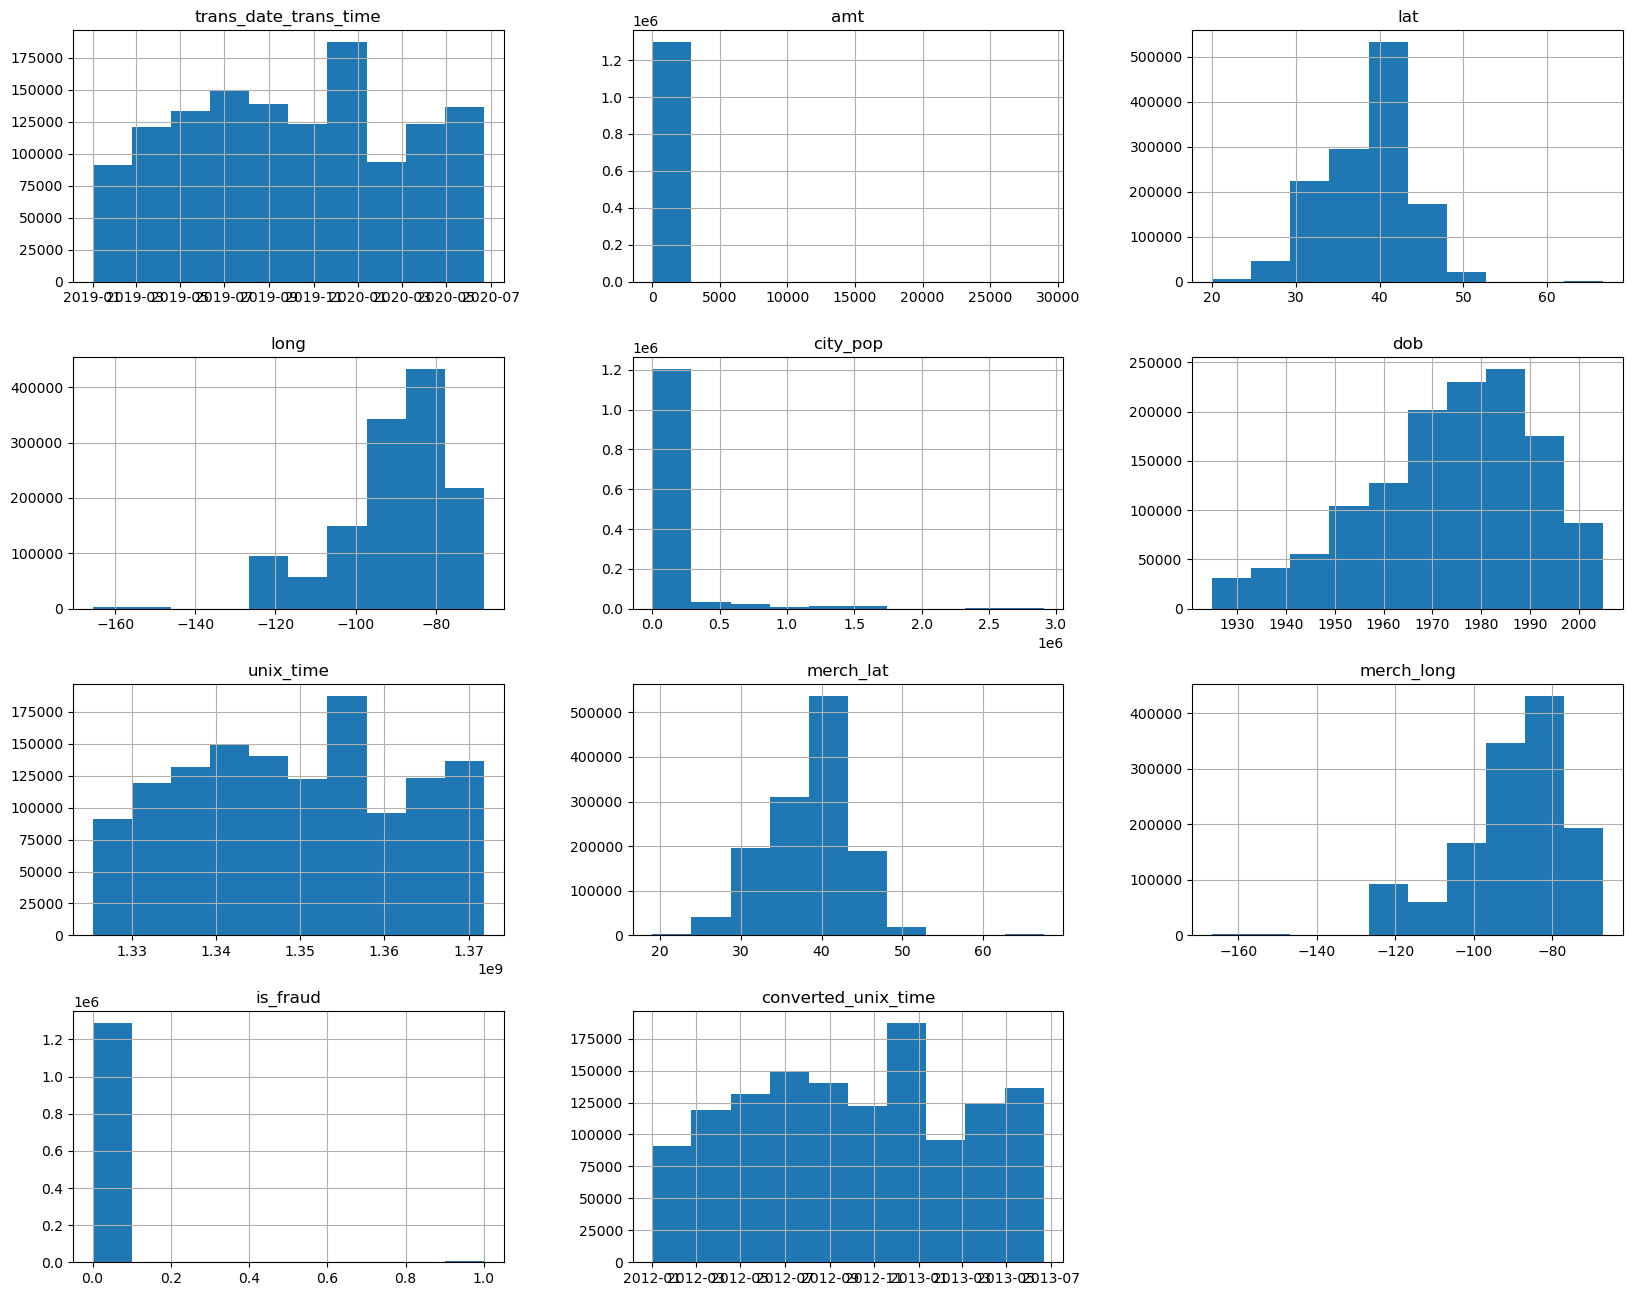

In [16]:
# plot histograms
df_raw.hist()

In the folder there is another file .html, take a look to see an example of the pandas_profiling output for our dataset.

In [ ]:
# unique values per column/variable



In [ ]:
# unique values for object type variables


In [ ]:
# plot unique values (bar chart)


In [ ]:
# subset features with less than 15 unique values


In [ ]:
# plot categorical columns less than 15 unique values using seaborn


In [ ]:
# count target variable


In [17]:
# create a stratified sampling from 30% of total `df_raw` rows
seed = 2019
df_sample = df_raw.groupby('is_fraud', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=seed))
df_sample

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,converted_unix_time
468195,2019-07-25 16:20:35,4587657402165341815,fraud_Hills-Witting,shopping_net,265.89,Amber,Lewis,F,6296 John Keys Suite 858,Pembroke Township,...,-87.5917,2135,"Psychotherapist, child",2004-05-08,d0e8265dc7e7b979c1533abebe95402c,1343233235,40.991185,-88.538586,0,2012-07-25 16:20:35
694039,2019-10-23 04:47:17,347612609554823,fraud_Kling Inc,gas_transport,68.21,Robert,James,M,18316 Cannon Place,Newport,...,-69.2675,3228,Lexicographer,1995-12-28,71a947bf4d90e76e4d5b9a5f1b1ec8b4,1350967637,44.680256,-69.390510,0,2012-10-23 04:47:17
1092424,2020-03-30 09:50:38,6011652924285713,fraud_DuBuque LLC,grocery_pos,95.39,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,Rocky Mount,...,-92.7059,1847,Tax inspector,1988-10-26,dfda32052a68f1452b1190b182672cb0,1364637038,38.954895,-91.927764,0,2013-03-30 09:50:38
47679,2019-01-28 22:32:55,4839615922685395,fraud_Grimes LLC,entertainment,21.39,Phillip,Robertson,M,85344 Smith Gateway Apt. 280,Harrodsburg,...,-86.5457,76,Social researcher,1955-05-06,8858dbc699716a100343e8402c3d2d17,1327789975,39.440657,-85.829947,0,2012-01-28 22:32:55
226502,2019-04-24 15:36:30,4989847570577635369,fraud_Ullrich Ltd,kids_pets,36.53,Vanessa,Anderson,F,21178 Brittney Locks,Prosperity,...,-81.5324,8333,Archaeologist,1994-07-09,b73f49b5c7081b864f1ba77678d86fce,1335281790,34.267058,-80.615114,0,2012-04-24 15:36:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567879,2019-08-29 22:07:20,3526826139003047,fraud_Block-Parisian,misc_net,853.27,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,Furniture designer,1955-07-06,91b28f3102c9055893488d23afde134e,1346278040,43.357421,-85.089403,1,2012-08-29 22:07:20
1000983,2020-02-15 02:30:12,30235438713303,fraud_Durgan-Auer,misc_net,750.98,James,Baldwin,M,3603 Mitchell Court,Winfield,...,-81.8900,5512,Exhibition designer,1980-03-24,e21fba3f053af7ea0bd31dfed1ddf2e4,1360895412,37.557927,-81.170028,1,2013-02-15 02:30:12
588497,2019-09-07 04:27:01,377264520876399,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,309.71,Kara,Miles,F,2076 Thomas Roads Suite 970,Cassatt,...,-80.5000,4424,Lawyer,1961-07-31,0cdec150cbb24a0e689a11001e9f0b15,1346992021,34.178315,-79.758965,1,2012-09-07 04:27:01
1233466,2020-05-30 02:45:14,6011681934117244,fraud_Koepp-Parker,grocery_pos,328.28,Kaitlyn,Newman,F,098 Stewart Hill,Slayden,...,-87.4581,70,Prison officer,1956-06-22,c8a8ae7f2d176c8235b20babb0ee8b80,1369881914,36.153313,-86.646337,1,2013-05-30 02:45:14


In [18]:
# Verify the sample set contains the same distribution of target variable as the population set.

df_sample['is_fraud'].value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

In [19]:
# !pip install pandas-profiling

# # using ydata-profiling
# import sys
# !{sys.executable} -m pip install -U ydata-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
# EDA - Pandas Profiling
from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

In [ ]:
# run ProfileReport using df_sample
profile = ProfileReport(df_sample,
                        title="Kaggle Credit Card Fraud Detection Dataset Profile Report",
                        correlations={
                            "auto": {"calculate": True},
                            "pearson": {"calculate": True},
                            "spearman": {"calculate": True},
                            "kendall": {"calculate": True},
                            "phi_k": {"calculate": True},
                            "cramers": {"calculate": True},
                        },
    )

profile.to_file('/content/drive/MyDrive/kaggle_credit_card_fraud_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: ignored

### Next steps:

1.  Which variables are more correlated with the target ('is_fraud')?  Which are not?

2.  Are some variables redundant? (Hint: Compare `unix_time` to `trans_date_trans_time`)

3.  Is `amt` (transaction amount) relevant to detect fraud?

4.  What features can we extract from `trans_date_trans_time`?

5.  What features have a high correlation? Are these features redundant?

In [ ]:
# convert `unix_time` to datetime type
# source: https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe
# df_raw['unix_time'] = pd.to_datetime(df_raw['unix_time'], unit = 's')
# df_raw

In [ ]:
# compare `unix_time` to `trans_date_trans_time`
# ((df_raw['trans_date_trans_time'] - df_raw['unix_time']).dt.total_seconds()/31536000).std()

In [ ]:
df_raw.corr()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
amt,1.000000,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
lat,-0.001926,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.000187,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,0.005818,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,-0.000293,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,-0.001873,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.000151,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721
is_fraud,0.219404,0.001894,0.001721,0.002136,-0.005078,0.001741,0.001721,1.000000


In [ ]:
# Extract additional

### Ideas for further exploration

 - Distance between lat/long and merchant lat/long
 - Hone in on the interactions
 - Next time we'll
     - wrap up EDA
     -




## Distance feature calcualtion
Below section shows logic to create an engineered "distance" feature, using the haversine formula for shortest distance betwen two points on a sphere(globe).

Additionally, it includes logic to do some further EDA on the new feature and categorical features.

Uses additional libraries:  haversine and dython

`!pip install haversine`

`!pip install dython`

In [17]:
# install haversine library
!pip install haversine
# install dython library
!pip install dython

In [12]:
from haversine import haversine, Unit
from dython.nominal import (identify_nominal_columns, associations)

In [69]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [5]:
df_raw.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [70]:
df_raw_factors = df_raw[[
    "is_fraud",
    "category",
    "amt",
    "gender",
    "city_pop",
    "job",
    "lat",
    "long",
    "merch_lat",
    "merch_long",

]].copy()

In [15]:
df_dist = df_raw[["trans_num", "is_fraud", "lat", "long", "merch_lat","merch_long", "category"]].copy()

In [16]:
df_dist.head()

,trans_num,is_fraud,lat,long,merch_lat,merch_long,category
0,0b242abb623afc578575680df30655b9,0,36.0788,-81.1781,36.011293,-82.048315,misc_net
1,1f76529f8574734946361c461b024d99,0,48.8878,-118.2105,49.159047,-118.186462,grocery_pos
2,a1a22d70485983eac12b5b88dad1cf95,0,42.1808,-112.2620,43.150704,-112.154481,entertainment
3,6b849c168bdad6f867558c3793159a81,0,46.2306,-112.1138,47.034331,-112.561071,gas_transport
4,a41d7549acf90789359a9aa5346dcb46,0,38.4207,-79.4629,38.674999,-78.632459,misc_pos


In [18]:
# put lat/long data in tuple fields for use in haversine function
df_dist["buyer_location"] = df_dist[["lat", "long"]].apply(tuple, axis=1)
df_dist["merchant_location"] = df_dist[["merch_lat", "merch_long"]].apply(tuple, axis=1)

In [28]:
df_dist.head()

,trans_num,is_fraud,lat,long,merch_lat,merch_long,category,buyer_location,merchant_location
0,0b242abb623afc578575680df30655b9,0,36.0788,-81.1781,36.011293,-82.048315,misc_net,"(36.0788, -81.1781)","(36.011293, -82.048315)"
1,1f76529f8574734946361c461b024d99,0,48.8878,-118.2105,49.159047,-118.186462,grocery_pos,"(48.8878, -118.2105)","(49.159047, -118.186462)"
2,a1a22d70485983eac12b5b88dad1cf95,0,42.1808,-112.2620,43.150704,-112.154481,entertainment,"(42.1808, -112.262)","(43.150704, -112.154481)"
3,6b849c168bdad6f867558c3793159a81,0,46.2306,-112.1138,47.034331,-112.561071,gas_transport,"(46.2306, -112.1138)","(47.034331, -112.561071)"
4,a41d7549acf90789359a9aa5346dcb46,0,38.4207,-79.4629,38.674999,-78.632459,misc_pos,"(38.4207, -79.4629)","(38.674999, -78.632459)"


In [52]:
df_dist.drop(columns=["lat","long", "merch_lat", "merch_long"], inplace=True)
df_dist.head()

,trans_num,is_fraud,category,buyer_location,merchant_location,distance
0,0b242abb623afc578575680df30655b9,0,misc_net,"(36.0788, -81.1781)","(36.011293, -82.048315)",48.84
1,1f76529f8574734946361c461b024d99,0,grocery_pos,"(48.8878, -118.2105)","(49.159047, -118.186462)",18.77
2,a1a22d70485983eac12b5b88dad1cf95,0,entertainment,"(42.1808, -112.262)","(43.150704, -112.154481)",67.24
3,6b849c168bdad6f867558c3793159a81,0,gas_transport,"(46.2306, -112.1138)","(47.034331, -112.561071)",59.45
4,a41d7549acf90789359a9aa5346dcb46,0,misc_pos,"(38.4207, -79.4629)","(38.674999, -78.632459)",48.19


In [35]:
# calculate distance between buyer_location and merchant_location
# for simplicity we are using the haversine distance formula, which is a shortest distance between points on a sphere
# other options could include methods like driving distance using google maps api or similar

def distance(row):
  return round((haversine(row["buyer_location"], row["merchant_location"], unit=Unit.MILES)),2)


In [38]:
df_dist["distance"] = df_dist.apply(distance, axis=1)

In [53]:
df_dist.head()

,trans_num,is_fraud,category,buyer_location,merchant_location,distance
0,0b242abb623afc578575680df30655b9,0,misc_net,"(36.0788, -81.1781)","(36.011293, -82.048315)",48.84
1,1f76529f8574734946361c461b024d99,0,grocery_pos,"(48.8878, -118.2105)","(49.159047, -118.186462)",18.77
2,a1a22d70485983eac12b5b88dad1cf95,0,entertainment,"(42.1808, -112.262)","(43.150704, -112.154481)",67.24
3,6b849c168bdad6f867558c3793159a81,0,gas_transport,"(46.2306, -112.1138)","(47.034331, -112.561071)",59.45
4,a41d7549acf90789359a9aa5346dcb46,0,misc_pos,"(38.4207, -79.4629)","(38.674999, -78.632459)",48.19


In [40]:
df_dist_corr = df_dist[["is_fraud", "distance"]].corr()

In [57]:
df_dist_corr

,is_fraud,distance
is_fraud,1.000000,0.000403
distance,0.000403,1.000000


In [42]:
df_dist["category"].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [58]:
df_dist_corr_by_category = df_dist.groupby("category")[["is_fraud", "distance"]].corr()

In [66]:
df_dist.groupby('category')[['is_fraud','distance']].corr().unstack().iloc[:,1]

category
entertainment     0.002179
food_dining      -0.000435
gas_transport    -0.002504
grocery_net      -0.001719
grocery_pos      -0.002218
health_fitness    0.002131
home              0.000097
kids_pets         0.002626
misc_net         -0.003087
misc_pos         -0.003489
personal_care     0.002203
shopping_net      0.002937
shopping_pos      0.004313
travel            0.004685
Name: (is_fraud, distance), dtype: float64

In [59]:
df_dist_corr_by_category

is_fraud  distance
category                                   
entertainment  is_fraud  1.000000  0.002179
               distance  0.002179  1.000000
food_dining    is_fraud  1.000000 -0.000435
               distance -0.000435  1.000000
gas_transport  is_fraud  1.000000 -0.002504
               distance -0.002504  1.000000
grocery_net    is_fraud  1.000000 -0.001719
               distance -0.001719  1.000000
grocery_pos    is_fraud  1.000000 -0.002218
               distance -0.002218  1.000000
health_fitness is_fraud  1.000000  0.002131
               distance  0.002131  1.000000
home           is_fraud  1.000000  0.000097
               distance  0.000097  1.000000
kids_pets      is_fraud  1.000000  0.002626
               distance  0.002626  1.000000
misc_net       is_fraud  1.000000 -0.003087
               distance -0.003087  1.000000
misc_pos       is_fraud  1.000000 -0.003489
               distance -0.003489  1.000000
personal_care  is_fraud  1.000000  0.002203
               distance  0.002203  1.000000
shopping_net   is_fraud  1.000000  0.002937
               distance  0.002937  1.000000
shopping_pos   is_fraud  1.000000  0.004313
               distance  0.004313  1.000000
travel         is_fraud  1.000000  0.004685
               distance  0.004685  1.000000

In [47]:
from dython.nominal import (identify_nominal_columns, associations)
# import dython

In [68]:
categorical_features=identify_nominal_columns(df_dist)
categorical_features

['trans_num', 'category', 'buyer_location', 'merchant_location']

In [73]:
df_raw_factors["buyer_location"] = df_raw_factors[["lat", "long"]].apply(tuple, axis=1)
df_raw_factors["merchant_location"] = df_raw_factors[["merch_lat", "merch_long"]].apply(tuple, axis=1)
df_raw_factors["distance"] = df_raw_factors.apply(distance, axis=1)


In [76]:
df_raw_factors.drop(columns=["buyer_location", "merchant_location"], inplace=True)

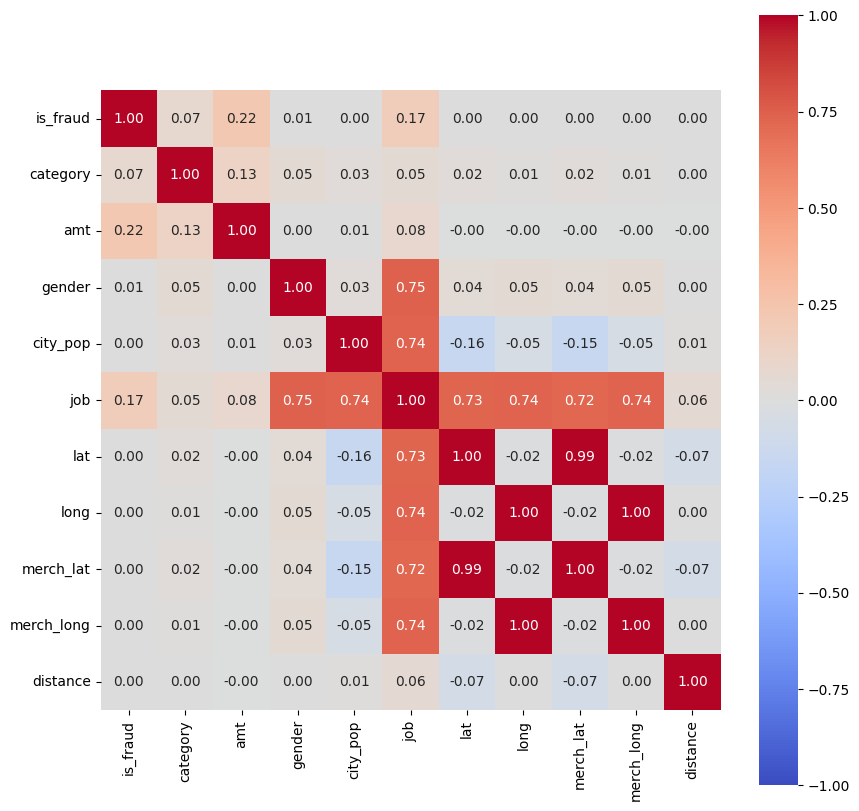

{'corr':             is_fraud  category       amt    gender  city_pop       job  \
 is_fraud    1.000000  0.070725  0.219404  0.007642  0.002136  0.173795   
 category    0.070725  1.000000  0.128671  0.053555  0.030899  0.048492   
 amt         0.219404  0.128671  1.000000  0.001034  0.005818  0.079704   
 gender      0.007642  0.053555  0.001034  1.000000  0.028649  0.747171   
 city_pop    0.002136  0.030899  0.005818  0.028649  1.000000  0.740040   
 job         0.173795  0.048492  0.079704  0.747171  0.740040  1.000000   
 lat         0.001894  0.024163 -0.001926  0.042935 -0.155730  0.729370   
 long        0.001721  0.011175 -0.000187  0.050404 -0.052715  0.740198   
 merch_lat   0.001741  0.024021 -0.001873  0.042645 -0.154781  0.724645   
 merch_long  0.001721  0.011143 -0.000151  0.050350 -0.052687  0.739563   
 distance    0.000403  0.003768 -0.001085  0.002394  0.010902  0.056659   
 
                  lat      long  merch_lat  merch_long  distance  
 is_fraud    0.001894  

In [77]:
associations(df_raw_factors, cmap='coolwarm', vmax=1.0, vmin=-1.0, fmt='.2f', annot=True, figsize=(10,10))